Tarea 5 Proyecto Análisis de Datos,
Estudiante: Diego Steven Sánchez Mora,
Tutor: Breyner Alexander Parra,
Análisis de datos,
2024.

In [1]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Importar bibliotecas
# Manejo y análisis de datos
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos de aprendizaje supervisado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [4]:
# Convertir el dateset en un DataFrame
df = pd.read_csv('Titanic-Dataset.csv')

1.	Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [5]:
#Información
print(df.head())  # Primeras filas del dataset
print(df.info())  # Información general (tipos de datos, valores faltantes)
print(df.describe())  # Estadísticas básicas de las columnas numéricas

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [6]:
# Revisión de valores nulos
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Imputar valores faltantes en la columna 'Embarked' con la moda
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Imputar valores faltantes en la columna 'Age' con la mediana de cada grupo
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
#Eliminar la columna "Cabin"
df.drop('Cabin', axis=1, inplace=True)

In [14]:
# Revisión de valores nulos
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


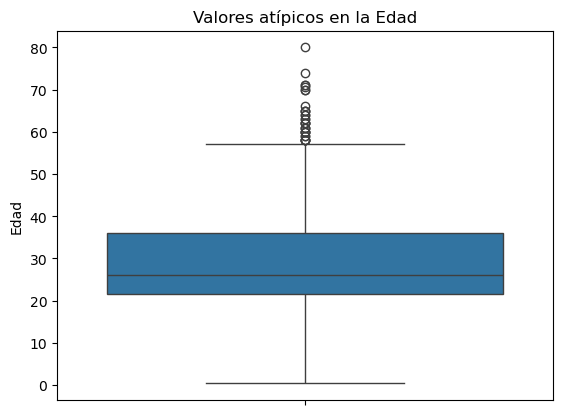

In [23]:
# Detección de valores atípicos en la columna Age
sns.boxplot(data=df, y='Age')
plt.title('Valores atípicos en la Edad')
plt.ylabel('Edad')
plt.show()

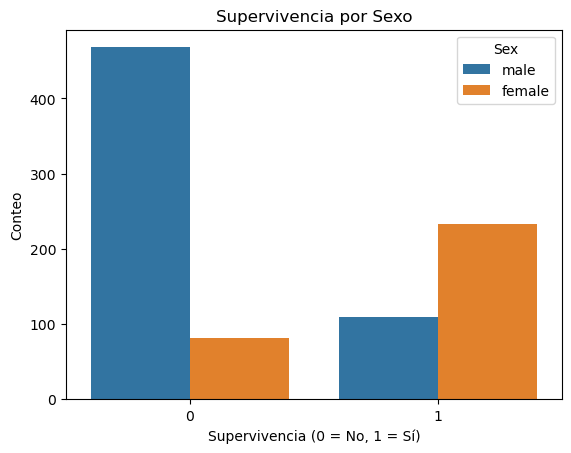

In [15]:
# Conteo de supervivientes por sexo
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Supervivencia por Sexo')
plt.xlabel('Supervivencia (0 = No, 1 = Sí)')
plt.ylabel('Conteo')
plt.show()

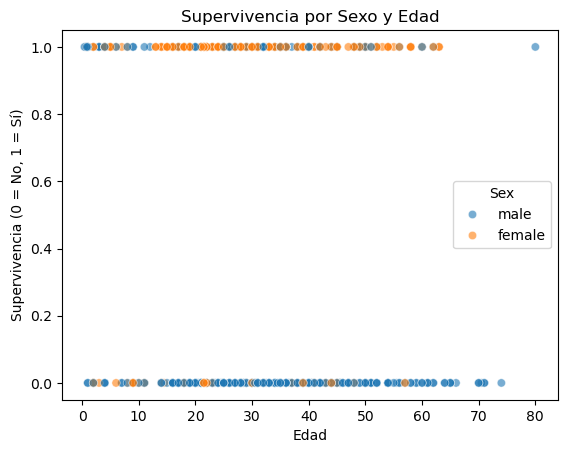

In [17]:
# Scatterplot con sexo, edad y supervivencia
sns.scatterplot(data=df, x='Age', y='Survived', hue='Sex', alpha=0.6)
plt.title('Supervivencia por Sexo y Edad')
plt.xlabel('Edad')
plt.ylabel('Supervivencia (0 = No, 1 = Sí)')
plt.show()

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [24]:
# Eliminar columnas irrelevantes
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
# Convertir 'Sex' a numérico
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [31]:
# Crear variables dummies para 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [32]:
print(df.head())  # Primeras filas del dataset

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True


In [35]:
# Variable dependiente
y = df['Survived']

# Variables independientes
X = df.drop('Survived', axis=1)

3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

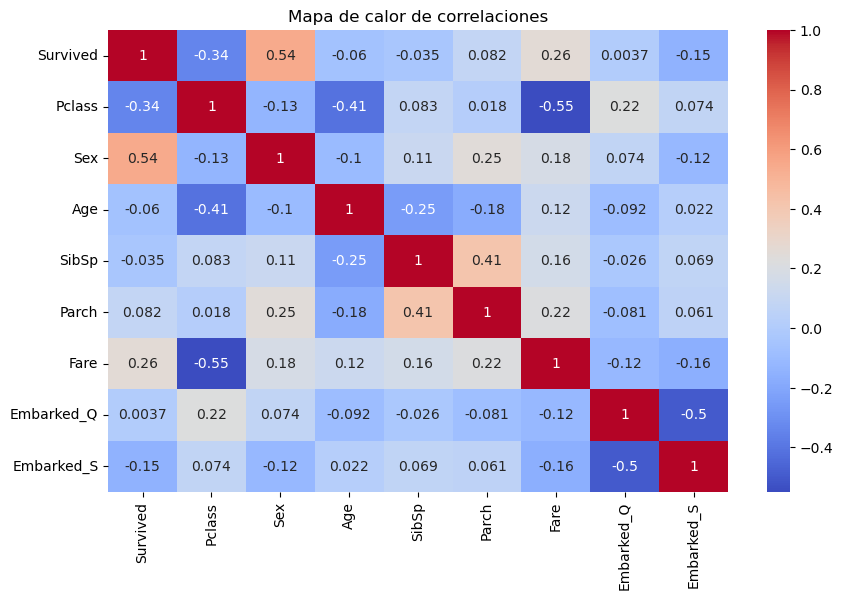

In [33]:
# Crear un mapa de calor para visualizar correlaciones
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

In [36]:
from sklearn.feature_selection import SelectKBest, chi2

# Convertir las variables numéricas a escala positiva
X_scaled = X.copy()
X_scaled[['Age', 'Fare']] = X_scaled[['Age', 'Fare']] - X_scaled[['Age', 'Fare']].min()

# Seleccionar las mejores características
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_scaled, y)

# Mostrar puntuaciones
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(feature_scores)

      Feature        Score
5        Fare  4518.319091
1         Sex   170.348127
0      Pclass    30.873699
2         Age    19.489770
4       Parch    10.097499
7  Embarked_S     5.489205
3       SibSp     2.581865
6  Embarked_Q     0.010847


In [37]:
from sklearn.feature_selection import RFE

# Modelo base
model = LogisticRegression(max_iter=1000, random_state=42)

# RFE para seleccionar las mejores características
rfe = RFE(model, n_features_to_select=5)  # Cambia el número según las características deseadas
rfe.fit(X, y)

# Mostrar las características seleccionadas
selected_features = pd.DataFrame({
    'Feature': X.columns,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print(selected_features)

      Feature  Selected  Ranking
0      Pclass      True        1
1         Sex      True        1
3       SibSp      True        1
6  Embarked_Q      True        1
7  Embarked_S      True        1
4       Parch     False        2
2         Age     False        3
5        Fare     False        4


4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [38]:
# Definir las características (X) y la variable objetivo (y)
X = df[['Pclass', 'Sex', 'Age']]  # Las características seleccionadas
y = df['Survived']  # La variable objetivo

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar la división
print(f"Datos de entrenamiento: {X_train.shape[0]} muestras")
print(f"Datos de prueba: {X_test.shape[0]} muestras")


Datos de entrenamiento: 712 muestras
Datos de prueba: 179 muestras


5. Entrenar el modelo configurando los diferentes hiperparámetros.
6.	Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Configurar el modelo de regresión logística
model = LogisticRegression(solver='liblinear', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimir los resultados
print(f"Precisión del modelo: {accuracy:.4f}")
print("\nMatriz de confusión:")
print(conf_matrix)
print("\nReporte de clasificación:")
print(class_report)


Precisión del modelo: 0.8045

Matriz de confusión:
[[91 14]
 [21 53]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



7.	Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

C:\Users\diego\AppData\Local\Temp\ipykernel_13060\3835894671.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Resultado', data=comparison, palette='coolwarm')


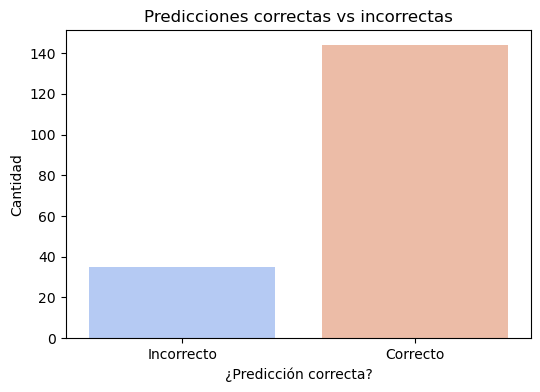

In [40]:
# Comparar las predicciones con los valores reales
comparison = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
comparison['Resultado'] = comparison['Real'] == comparison['Predicción']

# Graficar
plt.figure(figsize=(6, 4))
sns.countplot(x='Resultado', data=comparison, palette='coolwarm')
plt.title("Predicciones correctas vs incorrectas")
plt.xlabel("¿Predicción correcta?")
plt.ylabel("Cantidad")
plt.xticks([0, 1], ["Incorrecto", "Correcto"])
plt.show()

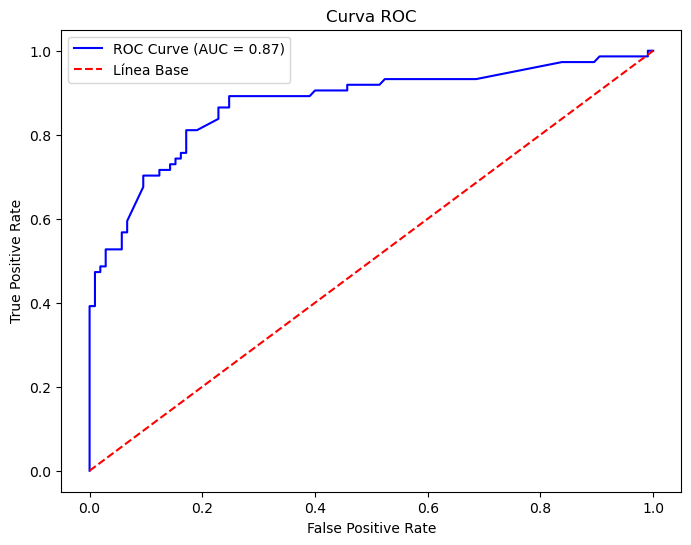

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades de predicción
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el AUC
auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle="--", label="Línea Base")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()

8.	Interpretar, analizar y documentar los resultados obtenidos.

Una vez documentados, interpretados y analizados los resultados a lo largo del documento podemos decir lo siguiente:
•	El modelo de regresión logística tiene una precisión global de 80.45% lo que indica que es adecuado para predecir la supervivencia del Titanic considerando las características seleccionadas.
•	Precisión: El modelo predice correctamente el 79% de los pasajeros que realmente sobrevivieron.
•	Recall: Captura correctamente el 72% de los pasajeros que sobrevivieron, aunque podría mejorarse.
•	F1-Score: El balance entre precisión y recall es de 0.75, lo cual muestra que el modelo es equilibrado.
